In [68]:
from graphrole import RoleExtractor, RecursiveFeatureExtractor
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import random
import csv

import embeddings
import metricas
import modelos

random.seed(42)

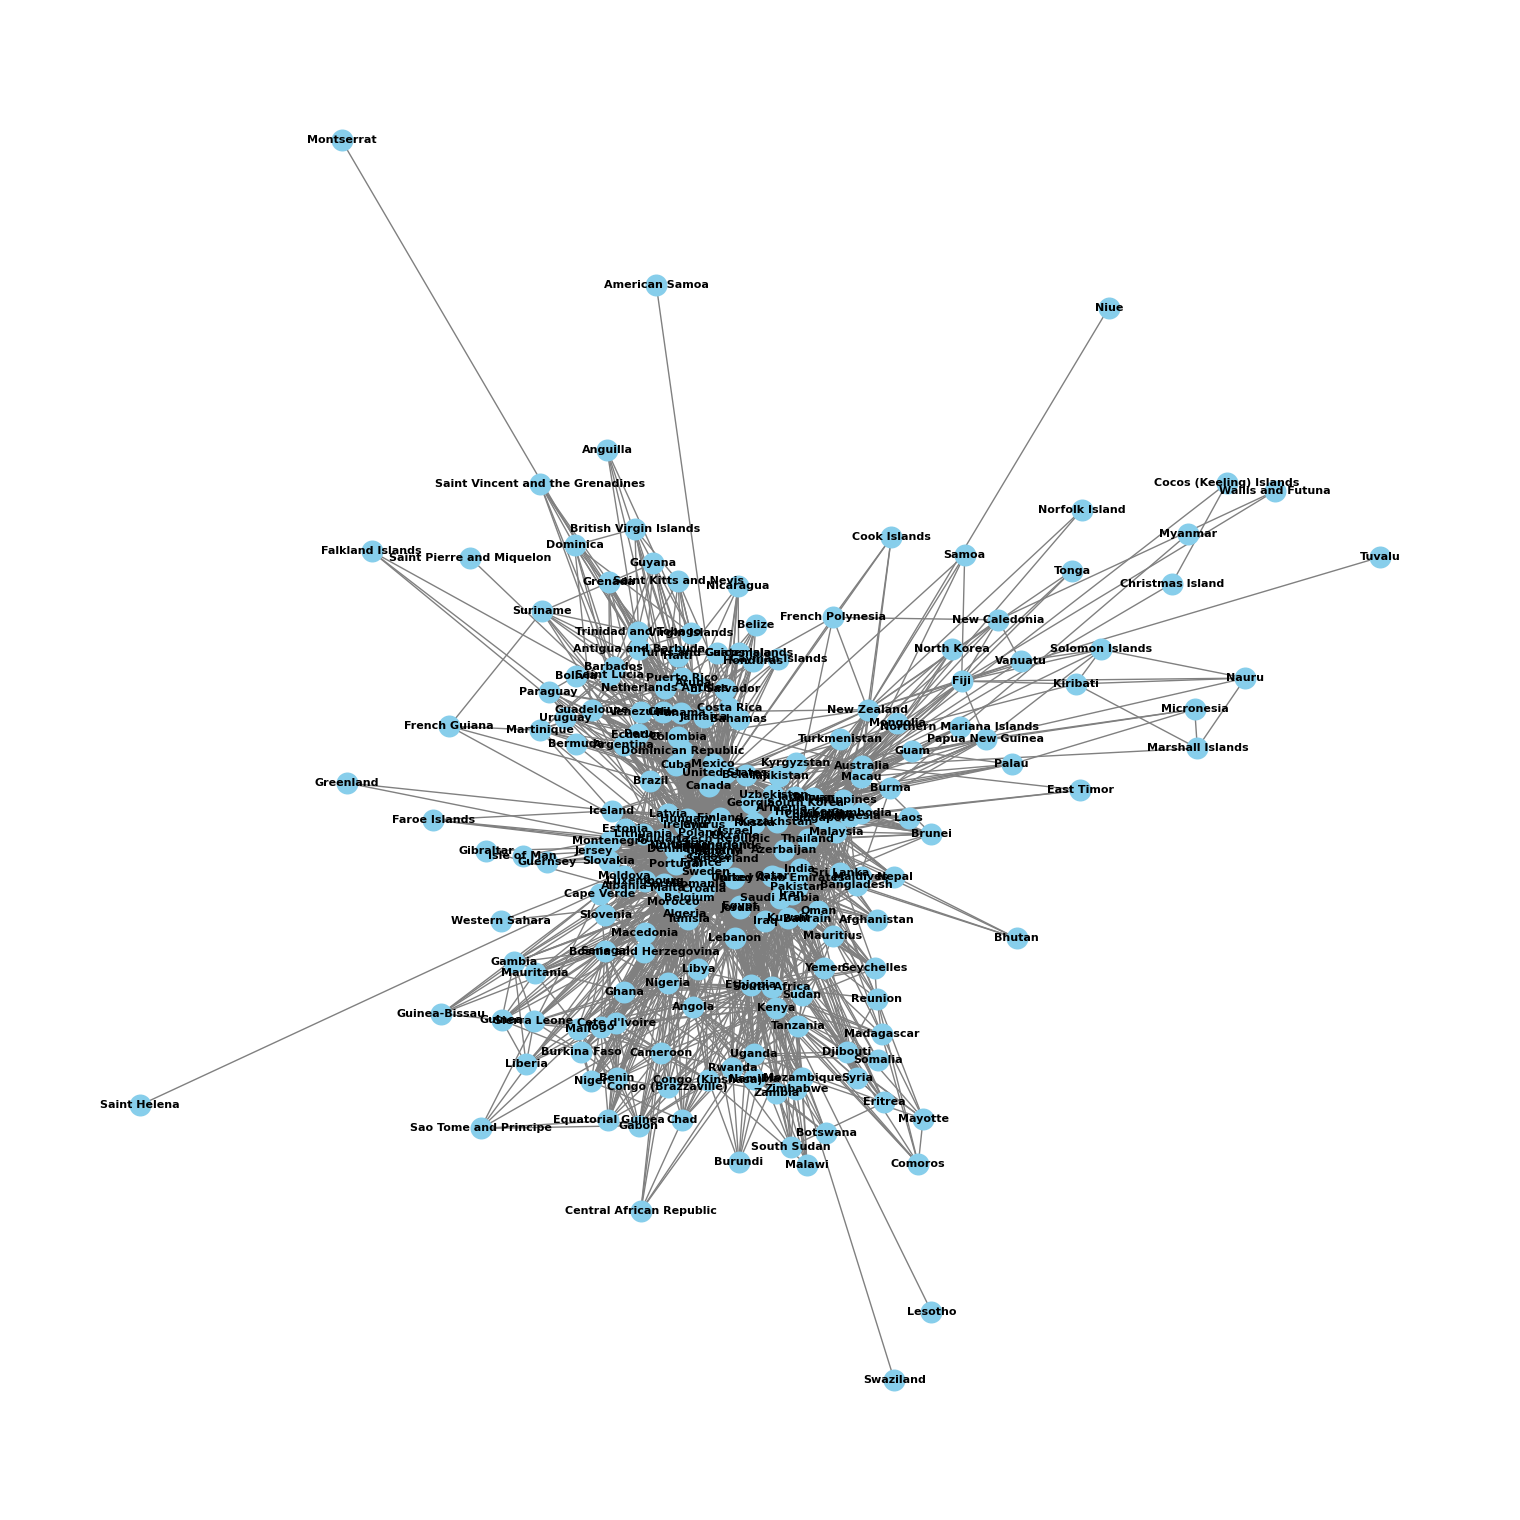

In [69]:
# Lee el archivo word.CSV
df = pd.read_csv('World.csv')

G = nx.Graph()

# Agrega nodos y aristas al grafo
for index, row in df.iterrows():
    G.add_edge(row['Origen'], row['Destino'], weight=row['ConexionAeropuertos'])

# Viendo el grafo 
plt.figure(figsize=(15, 15))
nx.draw(G, 
        with_labels=True, 
        node_size=250, 
        node_color="skyblue", 
        font_size=8, 
        font_color="black", 
        font_weight="bold", 
        edge_color="gray", 
        linewidths=0.01)
plt.show()

In [70]:
'''
---: Analisis basico de la red :---

1. Determinar
a) El diámetro de la red.
b) El grado promedio de la red.
c) El coeficiente de clustering promedio de la red.
'''


# a) El diámetro de la red.
diameter = nx.diameter(G)


# b) El grado promedio de la red.
def avg_degree(G):
    edges = 0
    degress = list(G.degree)
    for country,degree in degress:
        edges += degree
    avg_degree = edges / (1*len(degress))
    return avg_degree


# c) El coeficiente de clustering promedio de la red.
def coef_clustering(G):
    avg_clus = 0
    clustering_rank = nx.clustering(G)
    for country, c in clustering_rank.items():
        avg_clus+=c
    avg_clus = avg_clus/len(clustering_rank)
    return avg_clus


print(f"El diámetro del grafo es: {diameter}")
print(f'El grado promedio de la red es {round(avg_degree(G),2)}') 
print(f'El coeficiente de clustering promedio de la red {round(coef_clustering(G),2)}')

El diámetro del grafo es: 5
El grado promedio de la red es 24.91
El coeficiente de clustering promedio de la red 0.66


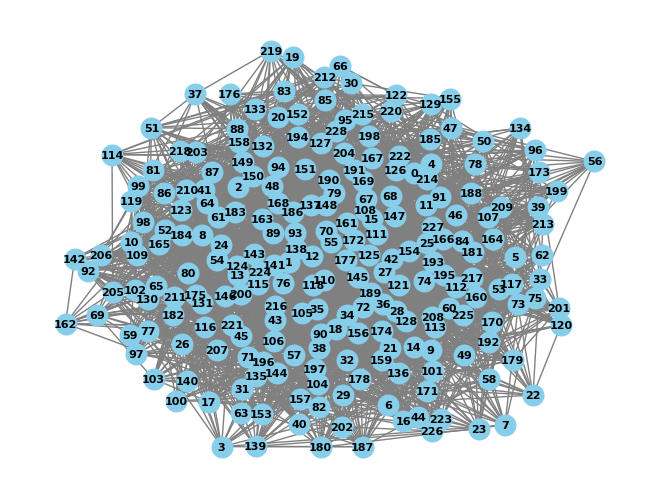

El diámetro del grafo es: 3
El grado promedio de la red es 24.97
El coeficiente de clustering promedio de la red 0.11


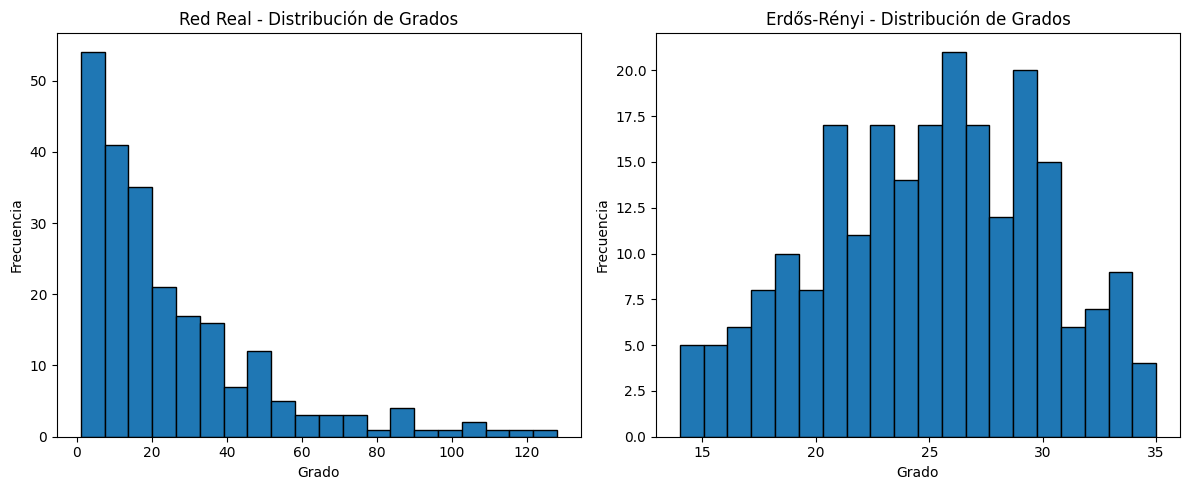

In [71]:
'''
2. Modelacion
a) Indicar si existe algún tipo de Homofilia y qué tipo de homofilia es. Si no hay homofilia
por ningún criterio, explicar. Justificar detalladamente.

b) Obtener una visualización de las comunidades presentes en dicha red (indicando el
algoritmo utilizado).

c) Considerando lo mencionado en el punto (2.a), ¿corresponde lo encontrado por el al-
goritmo de detección de comunidades en relación a lo indicado en dicho punto? ¿Se
verifica que efectivamente hay homofilia, o no, según hayas indicado? ¿como contrastan
este resultado con lo indicado (y calculado) anteriormente?
'''

# A) Simulación de un modelado de Erdös-Rényi
nodes = len(G.nodes)
k = grado_promedio(G)


G_erdos_renyi = erdos_renyi(nodes,k)
pos = nx.spring_layout(G_erdos_renyi, k=1)
nx.draw(G_erdos_renyi, 
        pos, 
        with_labels=True, 
        node_size=250, 
        node_color="skyblue", 
        font_size=8, 
        font_color="black", 
        font_weight="bold", 
        edge_color="gray", 
        linewidths=0.01)
plt.show()

# Metricas de la red Erdös-Rényi.
print(f"El diámetro del grafo es: {nx.diameter(G_erdos_renyi)}")
print(f'El grado promedio de la red es {round(avg_degree(G_erdos_renyi),2)}') 
print(f'El coeficiente de clustering promedio de la red {round(coef_clustering(G_erdos_renyi),2)}')

# Comparacion distribucion de los grados.
degrees = [degree for node, degree in G.degree()]
degrees_erdos = [degree for node, degree in G_erdos_renyi.degree()]

plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)
plt.hist(degrees, bins=20, edgecolor='k')
plt.title("Red Real - Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(degrees_erdos, bins=20, edgecolor='k')
plt.title("Erdős-Rényi - Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [72]:
# Guardamos la red modelada para luego importarla en gephi.
with open("erdos_renyi.csv", 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['source', 'target', 'weight'])  # Escribir encabezados

    for edge in G_erdos_renyi.edges():
        csv_writer.writerow([edge[0], edge[1], 1])

Alfa: 2.449890843293105 (Estimador Maxima Verosimilitud)
Alfa:  2.6


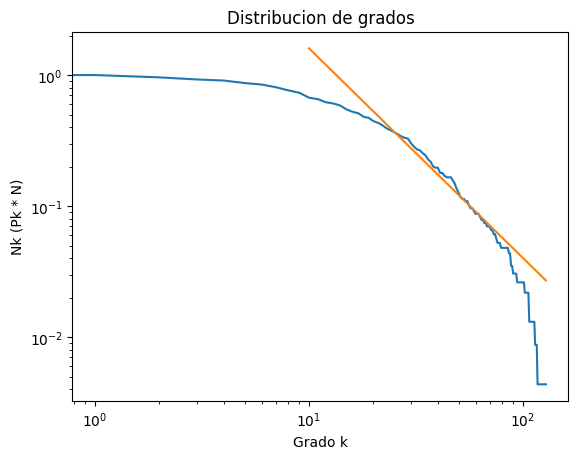

In [97]:
def graficar_distribuciones(distribucion_grados):
    rango = np.arange(len(distribucion_grados))
    plt.plot(rango, distribucion_grados)

    # Para obtener el valor de alfa vistualmente
    x_m = 10
    alpha_prima = 1.6
    z = alpha_prima*(x_m**alpha_prima)
    exponencial = list(map(lambda k: z * k ** (-alpha_prima), rango[x_m:]))
    plt.plot(rango[x_m:], exponencial)
    print("Alfa: ", alpha_prima + 1)

    plt.xlabel("Grado k")
    plt.ylabel("Nk (Pk * N)")
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Distribucion de grados")
    plt.show()

alpha = alfa_preferential_attachment(G,10)
print(f'Alfa: {alpha} (Estimador Maxima Verosimilitud)')
dist_grado = distrubucion_ccdf(G)
graficar_distribuciones(dist_grado)

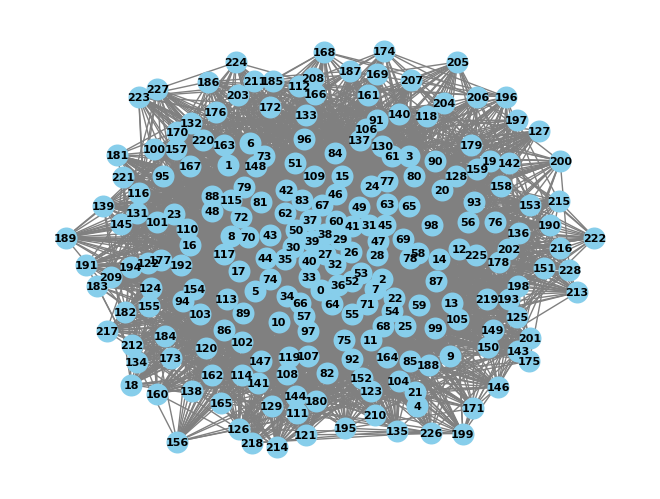

El diámetro del grafo es: 3
El grado promedio de la red es 44.54
El coeficiente de clustering promedio de la red 0.29


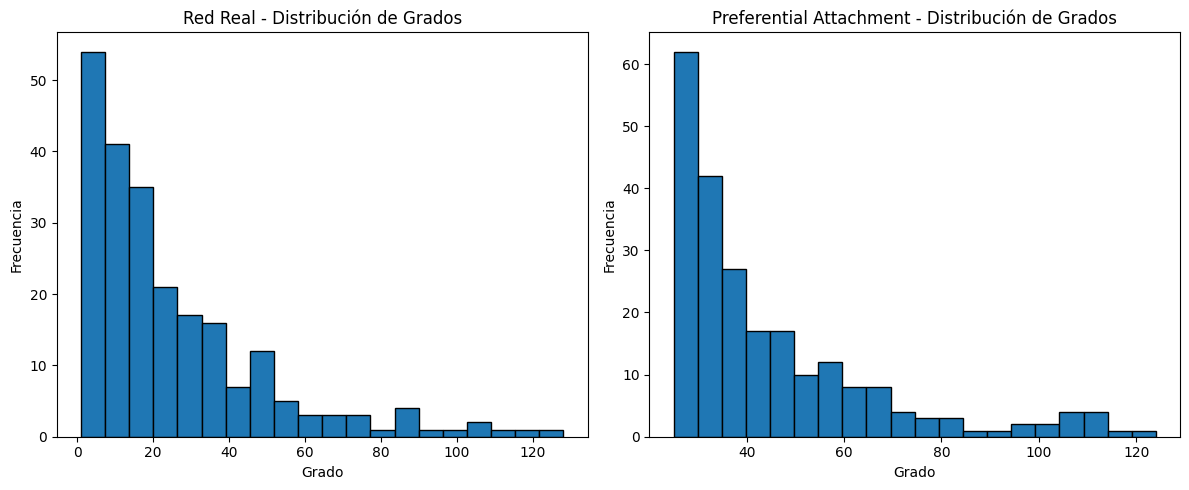

In [122]:
# Ambos metodos para calcular alpha dieron similares
nodes = G.number_of_nodes()

#G_preferential_attachment = preferential_attachment(False, alpha, nodes, grado_promedio(G))
G_preferential_attachment = nx.barabasi_albert_graph(nodes, round(grado_promedio(G)))

pos = nx.spring_layout(G_preferential_attachment, k=1)
nx.draw(G_preferential_attachment, 
        pos, 
        with_labels=True, 
        node_size=250, 
        node_color="skyblue", 
        font_size=8, 
        font_color="black", 
        font_weight="bold", 
        edge_color="gray", 
        linewidths=0.01)
plt.show()

# Metricas de la red Preferential Attachment.
print(f"El diámetro del grafo es: {nx.diameter(G_preferential_attachment)}")
print(f'El grado promedio de la red es {round(grado_promedio(G_preferential_attachment),2)}') 
print(f'El coeficiente de clustering promedio de la red {round(coef_clustering(G_preferential_attachment),2)}')

# Comparacion distribucion de los grados.
degrees = [degree for node, degree in G.degree()]
degrees_preferential_attachment = [degree for node, degree in G_preferential_attachment.degree()]

plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)
plt.hist(degrees, bins=20, edgecolor='k')
plt.title("Red Real - Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(degrees_preferential_attachment, bins=20, edgecolor='k')
plt.title("Preferential Attachment - Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [ ]:
# Guardamos la red modelada para luego importarla en gephi.
with open("preferential_attachment.csv", 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['source', 'target', 'weight'])  # Escribir encabezados

    for edge in G_pref_attach.edges():
        csv_writer.writerow([edge[0], edge[1], 1])

In [ ]:
'''
6. Detectar los roles en dicha red utilizando el algoritmo RolX, explicando el resultado obtenido
'''
feature_extractor = RecursiveFeatureExtractor(G, attributes=True, attributes_include=['weight'])
features = feature_extractor.extract_features()

role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)

for k,v in role_extractor.roles.items():
    print(f'{k},{v}')

In [ ]:
'''
7) Determinar los puentes (globales o locales) en dicha red
'''
print(f'Puentes globales')
for u,v in list(nx.bridges(G)):
    print(f'{u} ({len(G[u])}) <----> {v} ({len(G[v])})') 

print()
print(f'Puentes locales')
for u,v,alt_path in list(nx.local_bridges(G)):
    print(f'{u} ({len(G[u])}) <----> {v} ({len(G[v])})') 
